# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> What could cause a person who makes an appointment with a doctor and receives all relevant information to be absent on the visitation day? This is a negative attitude which can result into many unpleasant outcomes especially when it becomes frequent. This has been the case in brazilian health sector over the years and even though a mitigating option, reminder by sms, was employed, there seem to be no visible change in the responses of people to scheduled visits. The discovery of the determinants for a person's appearance at a scheduled appointment, which is the main goal of this study, will be a huge relief.

> This dataset includes information from 110k medical appointments in Brazil, collected in May/June 2016. It contains information on the attributes of each individual and their various final responses to the appointment schedule. It has 14 unique attributes and no_show attribute being the only independent variable. Its attributes include:

* ID
* ScheduledDay: indicates to the day the patients set up the appointment on.
* AppointmentDay: is the day that the patient is going to hospital.
* Neighborhood: indicates the location of the hospital.
* Age
* Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Hypertension: if the patient suffers from Hipertension.
* Diabetes:if the patient suffers from Diabetes.
* Alcoholism: if the patient is Alcoholism
* Handcap: if the patient has a Handcap.
* SMS_received: if the patient receied an SMS.
* No-show: if the patient missed his/her appointment, 'Yes' indicates that the patient missed the appointment 'No' indicates that the patient did not miss the appointment.

### Question(s) for Analysis
> This project will provide further information on the questions listed below.

1. Do patients under the Brazilian welfare scholarship program show up more than other patients?
2. Does receiving reminder messages influence honoring appointment schedules?
3. What age group is most registered for health check up? Which show up more?
4. Does the number of days between appointment and scheduled date have an effect on the showing up of a patient?
5. Which gender predominantly showup for appointment?

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline






<a id='wrangling'></a>
## Data Wrangling

> The process of cleaning, organizing, and changing raw data into the necessary format for various analyses is known as data wrangling. In this section of the report, the data will be loaded, cleaned, and trimmed for analysis. 


### General Properties


In [3]:
# Loading data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [4]:
# Print a few lines for general assessment
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Assessing number of rows and columns
df.shape

(110527, 14)

In [6]:
# Assessing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Assessing column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
# Assessing datatypes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
# Assessing null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
# Assessing duplicates
df.duplicated().sum()

0

In [11]:
# Assessing number of unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning
> **Cleaning datatype**
> * Convert schedule date and appoinment date datatype to datetime data.

> **Cleaning columns**
> * Convert ScheduledDay and AppointmentDay columns to datetime datatype, with the seconds removed. 
> * Delete all columns that no relevant.
> * Change column names to lowercase.
> * Rename misspelt columns and replace all inappropiate symbols.

> **Cleaning data and rows**
> * Remove any row with a negative age.
> * Replace values larger than 1 in Handcap column with 1.
> * Change the values 'yes' and 'no' in the no_show column to 1s and 0s.


In [12]:
# Convert ScheduledDay and AppointmentDay columns from string to datetime datatype 

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], utc = True).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], utc = True).dt.date

In [13]:
# Drop non-relevant columns
df.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)

In [14]:
# Confirmation of wrangled datatypes
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

In [15]:
# Cleaning column labels by changing alphabetic character to lower case
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

In [16]:
# Renaming some columns
df.rename(columns = {'hipertension':'hypertension', 'handcap':'handicap','no-show':'no_show'}, inplace = True)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

In [17]:
# Exploring summary statistics
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
# Dropping negative age value
neg = df[df['age'] < 0]
df.drop(neg.index, inplace = True)
neg

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [19]:
# Cleaning the handicap column and changing all values greater than 1 to 1
hand = df[df['handicap'] > 1]
df.loc[ df['handicap'] > 1, 'handicap'] = 1
hand.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
946,M,2016-04-14,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,No
1665,M,2016-03-30,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,M,2016-03-30,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,M,2016-04-29,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,F,2016-04-29,2016-04-29,11,ANDORINHAS,0,0,0,0,2,0,No


In [20]:
# Changing the values 'yes' and 'no' in the no_show column to 1s and 0s
df.loc[ df['no_show'] == 'Yes', 'no_show'] = 1
df.loc[ df['no_show'] == 'No', 'no_show'] = 0
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [21]:
# Overall assessment
df.head(20)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis





> Exploratory data analysis (EDA) is a way of examining, investigating, and summarizing data sets' major properties, which frequently involves the use of data visualization techniques. It assists data analysts in determining how to best modify data sources to obtain the answers they require, making it easier for them to uncover patterns, abnormalities, and outliers.

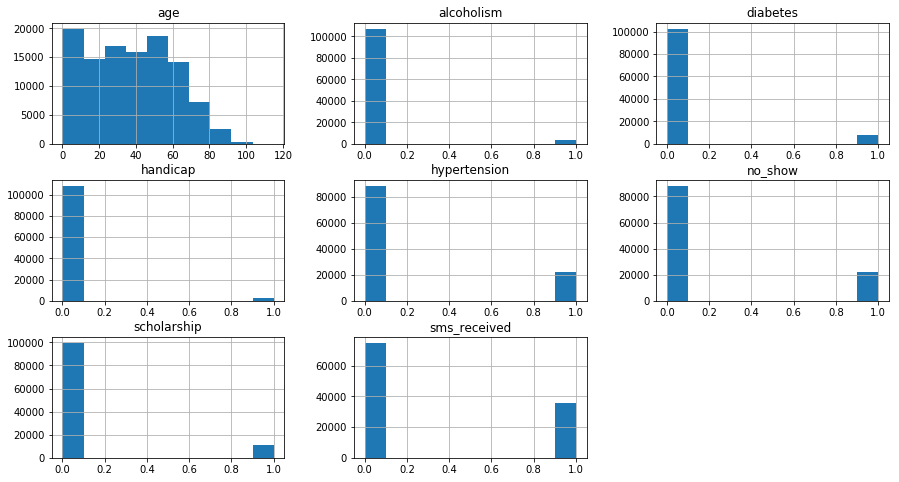

In [22]:
# Visualizing data using hostogram
df.hist(figsize = (15,8));

This visualization shows the spread of the data as well as some statiscal sumary of the entire dataset

### Research Question 1 (Do citizens under the Brazilian welfare scholarship program show up more than other patients?)
> This information will reveal if people with sholarships show up more than those without it

In [23]:
# Count of citizens' scholarship status
sch = df['scholarship'].value_counts()
sch

0    99665
1    10861
Name: scholarship, dtype: int64

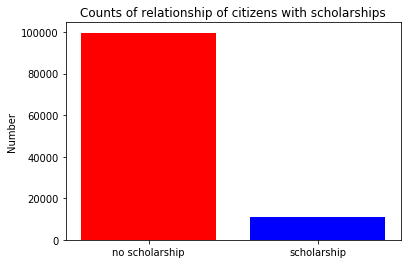

In [24]:
# Creating a function for the visualization EDA of the counts of citizens' scholarship status
color = ['red','blue']
horizontal_label = ['no scholarship','scholarship']
def barchart(sch,horizontal_label,color):
    plt.bar(horizontal_label, sch, color = color)
    plt.title("Counts of relationship of citizens with scholarships")
    plt.ylabel("Number");
    plt.show()
    
barchart(sch,horizontal_label,color)

This chart reveals that the total number of citizens with entitled to the Brazilian health scholarship is much lesser than those without scholarships

In [25]:
# Count of scholarship beneficials and their attendance status
df.groupby('scholarship').no_show.value_counts()

scholarship  no_show
0            0          79924
             1          19741
1            0           8283
             1           2578
Name: no_show, dtype: int64

In [26]:
# Creating seperate dataframes for people absent and present for appoiontment
df_Present = df.query('no_show == 1')
df_Absent = df.query('no_show == 0')

In [27]:
# Count of present citizens without scholarship
P = (df_Present.scholarship == 0).sum()
P

19741

In [28]:
# Count of present citizens with scholarship
Q = (df_Present.scholarship == 1).sum()
Q

2578

In [29]:
# Count of absent citizens without scholarship
R = (df_Absent.scholarship == 0).sum()
R

79924

In [30]:
# Count of absent citizens with scholarship
S = (df_Absent.scholarship == 1).sum()
S

8283

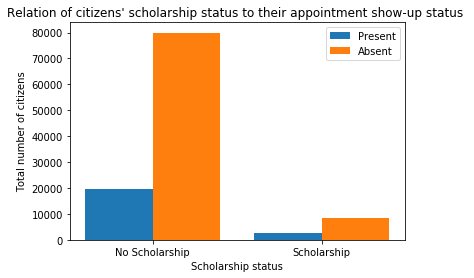

In [31]:
# Visual EDA showing the relationship between citizens' with and without scholarship and their appointment show-up status
groups = ['No Scholarship', 'Scholarship']

no_sch = [P, Q]
sch = [R,S]

X_axis = np.arange(len(groups))
plt.bar(X_axis - 0.2, no_sch,  width = 0.4,  label = 'Present')
plt.bar(X_axis + 0.2, sch, width = 0.4, label = 'Absent')

plt.xticks(X_axis, groups)
plt.xlabel("Scholarship status")
plt.ylabel("Total number of citizens")
plt.title("Relation of citizens' scholarship status to their appointment show-up status ")
plt.legend();

This chart indicates that having a scholarship does not guarantee the presence of citizen. The number of citizen without scholarship who show up is greater than that of with scholarship.

### Research Question 2  (Does receiving reminder messages influence honoring appointment schedules)

> * This information will reveal the impact of sms reminder on people's absence

In [32]:
# Count of citizens who received and did not receive sms for appointment reminder
count = df['sms_received'].value_counts()
count

0    75044
1    35482
Name: sms_received, dtype: int64

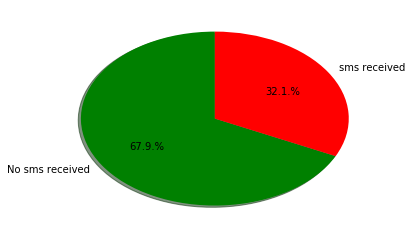

In [33]:
# Visual EDA and percentage representations of citizens who received and did not receive sms for appointment
col = ['green', 'red']
plt.pie(count, labels = ['No sms received', 'sms received'], autopct = '%1.1f.%%', startangle = 90, shadow = True, colors = col);

This pie chart analyses the percentage of total number of people who received the SMS reminder and it infers that the percentage population of people who do not receive reminder is higher than those that were reminded.

In [34]:
# Count of citizens who received sms and their attendance status
df.groupby('sms_received').no_show.value_counts()

sms_received  no_show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: no_show, dtype: int64

In [35]:
# Count of present citizens who did not receive reminders
A = (df_Present.sms_received == 0).sum()
A

12535

In [36]:
# Count of present citizens who received reminders
B = (df_Present.sms_received == 1).sum()
B

9784

In [37]:
# Count of absent citizens who did not receive reminders
C = (df_Absent.sms_received == 0).sum()
C

62509

In [38]:
# Count of absent citizens who received reminders
D = (df_Absent.sms_received == 1).sum()
D

25698

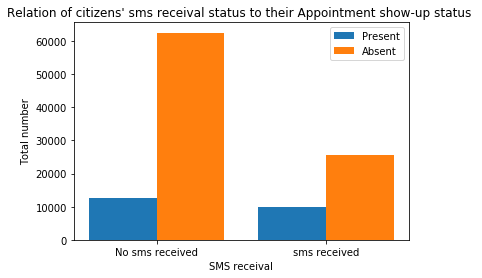

In [39]:
# Visual EDA showing relation between patients' sms reminder and their appointment show-up status
group = ['No sms received', 'sms received']

No_sch = [A, B]
sch = [C,D]

X_axis = np.arange(len(group))
plt.bar(X_axis - 0.2, No_sch,  width = 0.4,  label = 'Present')
plt.bar(X_axis + 0.2, sch, width = 0.4, label = 'Absent')

plt.xticks(X_axis, group)
plt.xlabel("SMS receival")
plt.ylabel("Total number")
plt.title("Relation of citizens' sms receival status to their Appointment show-up status ")
plt.legend();

This multiple bar chart shows that the majority of people who showed up did not receive any SMS reminder.

### Research Question 3 (What age group is most registered for health check up? Which show up more?)

> * This information will reveal the age group that is usually present in health care centers, honoring their appointments

In [40]:
# Seperating the age columns into groups 
bins = [0,5,13,20,40,70,120]
labels = ['Toddler', 'Pre-Teen','Teen','Young Adult','Adult', 'Older Adult']

df['agegroup'] = pd.cut(df['age'], bins = bins, labels = labels, right = False)

In [41]:
# Count of Age groups
agecount = df['agegroup'].value_counts()
agecount

Adult          41948
Young Adult    28870
Pre-Teen       10794
Toddler        10242
Teen            9375
Older Adult     9297
Name: agegroup, dtype: int64

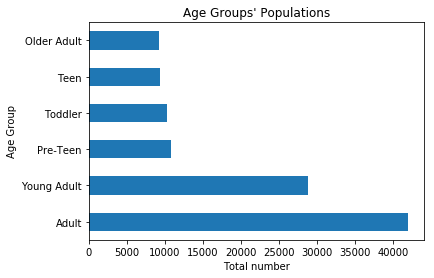

In [42]:
# Visual display of agegroup on barchart
agecount.plot(kind = 'barh');
plt.xlabel("Total number")
plt.ylabel("Age Group")
plt.title("Age Groups' Populations");

This chart reveals the population of each age group that were scheduled for health appointment, with  adults and young adults taking the leads.

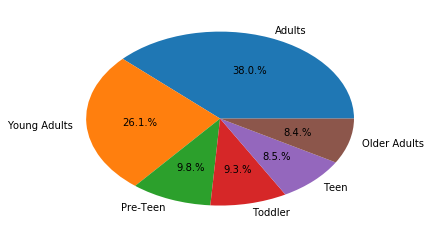

In [43]:
# Visual display of the percentage of each agegroup on pie chart
plt.pie(agecount, labels = ['Adults','Young Adults',  'Pre-Teen', 'Toddler','Teen','Older Adults'],autopct = '%1.1f.%%');

The above chart shows the percent population of each agegroup who were scheduled for health appointment, with adults and yound adults having the highest percentages.

In [44]:
# Creation of new dataframe for people who were present at appointment
df_Present = df.query('no_show == 1')

# Count of age groups present at appointment
sa = df_Present['agegroup'].value_counts()
sa

Adult          7446
Young Adult    6680
Pre-Teen       2442
Teen           2434
Toddler        1865
Older Adult    1452
Name: agegroup, dtype: int64

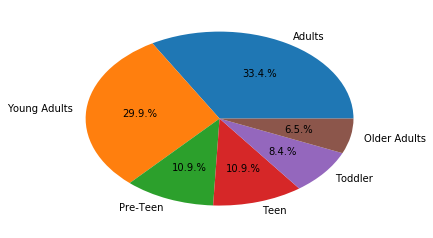

In [45]:
# Visual display of the percentage of agegroups present at appointment 
plt.pie(sa, labels = ['Adults','Young Adults',  'Pre-Teen', 'Teen', 'Toddler','Older Adults'],autopct = '%1.1f.%%');

This pie chart shows the percentage population per age group that honored scheduled appointments and reveals that adults and youngs adults are getting better health care than other groups.

### Research Question 4 (Does the number of days between appointment and scheduled date have an effect on the showing up of a person?)

> * This question will reveal how waiting day will affect a person's show up

In [46]:
# More data cleaning
# Finding the difference between appointment and scheduled days
df['days_diff'] = df['appointmentday'] - df['scheduledday']

# Convert days_diff column to integer
df['days_diff'] = df['days_diff'].dt.days.astype(int)

In [47]:
# Checking negative values in days_diff column
neg_days = df.query('days_diff < 0')

# Dropping records with negative value
df.drop(neg_days.index, inplace = True)
neg_days

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,agegroup,days_diff
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,1,Young Adult,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,Teen,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,1,Young Adult,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,Older Adult,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,1,Pre-Teen,-1


In [48]:
# Creation of new dataframe for people who were present at appointment
df_Present = df.query('no_show == 1')
df_Absent = df.query('no_show == 0')

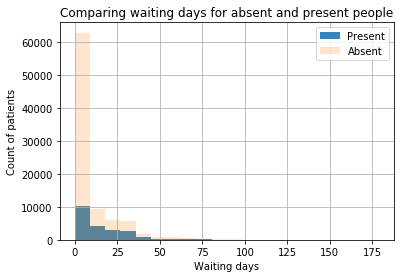

In [49]:
# Comparing the waiting days (difference between scheduled and appointment date) between present and absent persons
df_Present['days_diff'].hist(alpha = 0.9,bins = 20, label = 'Present')
df_Absent['days_diff'].hist(alpha = 0.2, bins = 20, label = 'Absent')
plt.title("Comparing waiting days for absent and present people")
plt.xlabel('Waiting days')
plt.ylabel("Count of patients")
plt.legend();

This histogram shows the correlation between the waiting days(difference between scheduled date and appointment date) of absent and present citizens. It is revealed that a larger number do not show up for appointment and people with shorter waiting periods may show up the most.

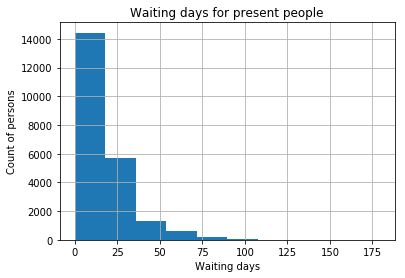

In [50]:
# Visual EDA of waiting days (difference between scheduled and appointment date) for present patient
df_Present['days_diff'].hist()
plt.title("Waiting days for present people")
plt.xlabel('Waiting days')
plt.ylabel("Count of persons");

This graph shows that people with short waiting period show up more than those with longer waiting periods

### Research Question 5 (Which gender predominantly showup for appointment?)

In [51]:
# Count of gender who were present for appointment
gender = df_Present['gender'].value_counts()
gender

F    14591
M     7723
Name: gender, dtype: int64

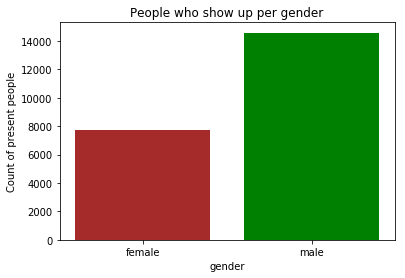

In [52]:
# Visualization of gender who were present for appointment
color = ['green','brown']
plt.bar(['male','female'],gender, color = color)
plt.title("People who show up per gender")
plt.xlabel('gender')
plt.ylabel("Count of present people");

    This graph reveals more male citizens honor appointment schedules than female citizens

<a id='conclusions'></a>
## Conclusions

> All information summarize from this result can be used to determine and predict the availability of a person to honor an appointment at any point in time. It can be employed when directing a market strategy regarding an health care product. It can also serve as an avenue to helping the government understand the behaviour of its people and drive thorough sensitization if needed. More time and energy will be saved and many people will have the opportunity to see the doctor as people who have the tendency to not show up will not be scheduled.

> 1. Population of people who have access to scholarship is less than the ones that do not have and the rate at which they show up is lower then that of those without any form of scholarship. This may be a result of the inability of scholarship benefiaries to afford transportation or their over-familiarity with medicines of lower standard (primitive). Thus, having a scholarship does not guarantee the presence of a person at scheduled appointments.

> 2. Sending reminder via SMS to people with scheduled appointment is a strategy that has been employed to mitigate the attitude of the citizens to health appointment schedules. This strategy however has not been effectively utilized as only 32.1% of registered people where sent a reminder in May/June, 2016, while the remaining received no such. This could either be a result of the inefficiency of the method over time causing a gradual abandonment of the idea. technical error, or the lackadaisical attitude of the government workers. The efficiency of this method is also questionable as this analysis has revealed that there is a higher tendency of registered citizens who never got an SMS to show up more than those who received it. Therefore, it is important that the government look beyond and search better, efficient and cost_effective solutions to the attitude of the citizens to health care.

> 3. Considering the different age groups in the country and their responses to health care, it's been revealed that adults and young adults have the higher tendency of getted scheduled appointment with overall percentages of 38 and 26.1, unlike the older adults, 8.5% and teens, 8.4%. The analysis also revealed that a higher percent of adults and young adults show up for appointment visits. From this analysis, it can be deduced that the adults receive more health care than the children and aged. The government should therefore enforce the mandatory registration and provision of adequate health care for children and teens, to reduce child mortality, and the aged.

> 4. This project has shown that the longer the appointment date, the less likely people will honor appointment. This maybe because they forgot. This result will help government or the health care sector develop a very effective way of reminding people of their responsibility towards their health and helping them uphold it.

> 5. The gender is a major determinant of the likeihood of a person to showup at the health care centre and it is shown that men show up more than women. This could be a result of the several engagement women are involved in. Strategies, specifically targeted at women, should be set up to bring more women into caring about their wellbeing the more


## Limitations

> 1. Some appointment dates were older than scheduled dates resulting in a negative value.
> 2. Data can be taken from different locations in Brazil with specification in the dataframe for better exploration.
> 3. The duration for the recording of the information (May/June) is too short. It would be better if it were within a longer period, with the minimum of 6 months. This will improve analysis.

## Resources
> 1. https://pandas.pydata.org/
> 2. https://matplotlib.org/stable/api/pyplot_summary.html
> 3.


In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0